In [1]:
import pandas as pd
import numpy as np
import sklearn as sl

In [2]:
ds = pd.read_csv('./data/train.csv')
ds.head(20)

,id,word,stress,num_syllables,lemma
0,0,румяной,2,3,румяный
1,1,цифрами,1,3,цифра
2,2,слугами,1,3,слуга
3,3,выбирает,3,4,выбирать
4,4,управдом,3,3,управдом
5,5,купюру,2,3,купюра
6,6,чёрта,1,2,черт
7,7,культурной,2,3,культурный
8,8,мэрии,1,3,мэрия
9,9,маркерные,2,4,маркерный


In [3]:
ds_ss = pd.read_csv('./data/sample_submission.csv')
ds_ss

,id,stress
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
29955,29955,1
29956,29956,1
29957,29957,1
29958,29958,1


In [4]:
ds_ss.loc[ds_ss['stress'] != 1]

,id,stress


In [5]:
ds_test = pd.read_csv('./data/test.csv')
ds_test

,id,word,num_syllables,lemma
0,0,эпилепсия,5,эпилепсия
1,1,относящейся,5,относиться
2,2,размышлениями,6,размышление
3,3,модемы,3,модем
4,4,солнц,1,солнце
...,...,...,...,...
29955,29955,донбасса,3,донбасс
29956,29956,обложка,3,обложка
29957,29957,правителя,4,правитель
29958,29958,шерстяной,3,шерстяной


In [6]:
ds.describe()

,id,stress,num_syllables
count,63438.000000,63438.000000,63438.000000
mean,31718.500000,2.209354,3.489691
std,18313.117525,0.912874,1.158803
min,0.000000,1.000000,1.000000
25%,15859.250000,2.000000,3.000000
50%,31718.500000,2.000000,3.000000
75%,47577.750000,3.000000,4.000000
max,63437.000000,6.000000,6.000000


# Поиск шумов

## Проверка на дурака: ударение на согласную букву не ставится!

In [7]:
ds_copy = ds.copy()

In [8]:
# «а» «у» «о» «и» «э» «ы» «я» «ю» «е» «ё»
vowels = ['а', 'е', 'ё', 'у', 'о', 'и', 'э', 'ы', 'ю', 'я']

#  Токенизация слов

In [9]:
ds[1000:1030]

,id,word,stress,num_syllables,lemma
1000,1000,тренировками,3,5,тренировка
1001,1001,профиле,1,3,профиль
1002,1002,звала,2,2,звать
1003,1003,окружающими,3,6,окружающий
1004,1004,трансплантации,3,5,трансплантация
1005,1005,смотрелся,2,3,смотреться
1006,1006,радиочасы,5,5,радиочасы
1007,1007,съемки,1,2,съемка
1008,1008,платки,2,2,платок
1009,1009,посидеть,3,3,посидеть


* можно на выход подавать номер слога
* можно на выход подавать номер ударной буквы, тогда НС будет как бы бинарно классифицировать падает ли на эту букву ударение

# Посчитаем длину слов

In [10]:
ds['words_lenght'] = [len(word) for word in ds['word']]
ds.sample(5)

,id,word,stress,num_syllables,lemma,words_lenght
1050,1050,бойне,1,2,бойня,5
35746,35746,минуса,1,3,минус,6
50470,50470,обрезки,2,3,обрезок,7
37011,37011,сошлись,2,2,сходиться,7
53297,53297,заразиться,3,4,заражаться,10


In [11]:
max_words_lenght = np.max(ds['words_lenght'])
max_words_lenght

20

In [12]:
ds['lemmas_lenght'] = [len(word) for word in ds['lemma']]
ds.sample(5)

,id,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght
13563,13563,комом,1,2,ком,5,3
58398,58398,антонова,2,4,антонова,8,8
61428,61428,петрова,2,3,петров,7,6
41658,41658,фельдфебель,2,3,фельдфебель,11,11
18349,18349,спустимся,1,3,спускаться,9,10


In [13]:
max_lemms_lenght = np.max(ds['lemmas_lenght'])
max_lemms_lenght

20

# Токенизируем слово и лемму

In [14]:
letter_list = ['а', 'б', 'в', 'г', 'д', 'е', 'ё', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я']
letter_by_number = {}
i = 1
for letter in letter_list:
    letter_by_number[letter] = i
    i+=1
letter_by_number

{'а': 1,
 'б': 2,
 'в': 3,
 'г': 4,
 'д': 5,
 'е': 6,
 'ё': 7,
 'ж': 8,
 'з': 9,
 'и': 10,
 'й': 11,
 'к': 12,
 'л': 13,
 'м': 14,
 'н': 15,
 'о': 16,
 'п': 17,
 'р': 18,
 'с': 19,
 'т': 20,
 'у': 21,
 'ф': 22,
 'х': 23,
 'ц': 24,
 'ч': 25,
 'ш': 26,
 'щ': 27,
 'ъ': 28,
 'ы': 29,
 'ь': 30,
 'э': 31,
 'ю': 32,
 'я': 33}

In [15]:
# Tokenize words
for i in range(0, max_words_lenght):
    ds[f'wl{i+1}'] = [(letter_by_number[word[i]] if len(word) > i else 0) for word in ds['word']]
    # is letter vowel?
    ds[f'is_wl_v{i+1}'] = [(1 if (len(word) > i and word[i] in vowels) else 0) for word in ds['word']]

In [16]:
# Tokenize lemms
for i in range(0, max_lemms_lenght):
    ds[f'll{i+1}'] = [(letter_by_number[lemma[i]] if len(lemma) > i else 0) for lemma in ds['lemma']]
    # is letter vowel?
    ds[f'is_ll_v{i+1}'] = [(1 if (len(lemma) > i and lemma[i] in vowels) else 0) for lemma in ds['lemma']]

In [17]:
ds.loc[ds['wl20'] != 0]

,id,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght,wl1,is_wl_v1,wl2,...,ll16,is_ll_v16,ll17,is_ll_v17,ll18,is_ll_v18,ll19,is_ll_v19,ll20,is_ll_v20
12855,12855,сельскохозяйственной,4,6,сельскохозяйственный,20,20,19,0,6,...,6,1,15,0,15,0,29,1,11,0
25342,25342,сельскохозяйственный,4,6,сельскохозяйственный,20,20,19,0,6,...,6,1,15,0,15,0,29,1,11,0
28767,28767,сельскохозяйственных,4,6,сельскохозяйственный,20,20,19,0,6,...,6,1,15,0,15,0,29,1,11,0
35738,35738,сельскохозяйственным,4,6,сельскохозяйственный,20,20,19,0,6,...,6,1,15,0,15,0,29,1,11,0


In [18]:
pd.set_option('display.max_columns', None)
ds.sample(3)

,id,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght,wl1,is_wl_v1,wl2,is_wl_v2,wl3,is_wl_v3,wl4,is_wl_v4,wl5,is_wl_v5,wl6,is_wl_v6,wl7,is_wl_v7,wl8,is_wl_v8,wl9,is_wl_v9,wl10,is_wl_v10,wl11,is_wl_v11,wl12,is_wl_v12,wl13,is_wl_v13,wl14,is_wl_v14,wl15,is_wl_v15,wl16,is_wl_v16,wl17,is_wl_v17,wl18,is_wl_v18,wl19,is_wl_v19,wl20,is_wl_v20,ll1,is_ll_v1,ll2,is_ll_v2,ll3,is_ll_v3,ll4,is_ll_v4,ll5,is_ll_v5,ll6,is_ll_v6,ll7,is_ll_v7,ll8,is_ll_v8,ll9,is_ll_v9,ll10,is_ll_v10,ll11,is_ll_v11,ll12,is_ll_v12,ll13,is_ll_v13,ll14,is_ll_v14,ll15,is_ll_v15,ll16,is_ll_v16,ll17,is_ll_v17,ll18,is_ll_v18,ll19,is_ll_v19,ll20,is_ll_v20
35548,35548,выстроены,1,4,выстраивать,9,11,3,0,29,1,19,0,20,0,18,0,16,1,6,1,15,0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,29,1,19,0,20,0,18,0,1,1,10,1,3,0,1,1,20,0,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17423,17423,новороссии,3,5,новороссия,10,10,15,0,16,1,3,0,16,1,18,0,16,1,19,0,19,0,10,1,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,16,1,3,0,16,1,18,0,16,1,19,0,19,0,10,1,33,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
63134,63134,расширенных,2,4,расширенный,11,11,18,0,1,1,19,0,26,0,10,1,18,0,6,1,15,0,15,0,29,1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,1,1,19,0,26,0,10,1,18,0,6,1,15,0,15,0,29,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
ds.loc[ds['is_ll_v20'] != 0]

,id,word,stress,num_syllables,lemma,words_lenght,lemmas_lenght,wl1,is_wl_v1,wl2,is_wl_v2,wl3,is_wl_v3,wl4,is_wl_v4,wl5,is_wl_v5,wl6,is_wl_v6,wl7,is_wl_v7,wl8,is_wl_v8,wl9,is_wl_v9,wl10,is_wl_v10,wl11,is_wl_v11,wl12,is_wl_v12,wl13,is_wl_v13,wl14,is_wl_v14,wl15,is_wl_v15,wl16,is_wl_v16,wl17,is_wl_v17,wl18,is_wl_v18,wl19,is_wl_v19,wl20,is_wl_v20,ll1,is_ll_v1,ll2,is_ll_v2,ll3,is_ll_v3,ll4,is_ll_v4,ll5,is_ll_v5,ll6,is_ll_v6,ll7,is_ll_v7,ll8,is_ll_v8,ll9,is_ll_v9,ll10,is_ll_v10,ll11,is_ll_v11,ll12,is_ll_v12,ll13,is_ll_v13,ll14,is_ll_v14,ll15,is_ll_v15,ll16,is_ll_v16,ll17,is_ll_v17,ll18,is_ll_v18,ll19,is_ll_v19,ll20,is_ll_v20
31068,31068,проконсультируйтесь,4,6,проконсультироваться,19,20,17,0,18,0,16,1,12,0,16,1,15,0,19,0,21,1,13,0,30,0,20,0,10,1,18,0,21,1,11,0,20,0,6,1,19,0,30,0,0,0,17,0,18,0,16,1,12,0,16,1,15,0,19,0,21,1,13,0,30,0,20,0,10,1,18,0,16,1,3,0,1,1,20,0,30,0,19,0,33,1


In [20]:
pd.set_option('display.max_columns', None)
ds.drop(['id', 'word', 'lemma'], axis=1).corr()

,stress,num_syllables,words_lenght,lemmas_lenght,wl1,is_wl_v1,wl2,is_wl_v2,wl3,is_wl_v3,wl4,is_wl_v4,wl5,is_wl_v5,wl6,is_wl_v6,wl7,is_wl_v7,wl8,is_wl_v8,wl9,is_wl_v9,wl10,is_wl_v10,wl11,is_wl_v11,wl12,is_wl_v12,wl13,is_wl_v13,wl14,is_wl_v14,wl15,is_wl_v15,wl16,is_wl_v16,wl17,is_wl_v17,wl18,is_wl_v18,wl19,is_wl_v19,wl20,is_wl_v20,ll1,is_ll_v1,ll2,is_ll_v2,ll3,is_ll_v3,ll4,is_ll_v4,ll5,is_ll_v5,ll6,is_ll_v6,ll7,is_ll_v7,ll8,is_ll_v8,ll9,is_ll_v9,ll10,is_ll_v10,ll11,is_ll_v11,ll12,is_ll_v12,ll13,is_ll_v13,ll14,is_ll_v14,ll15,is_ll_v15,ll16,is_ll_v16,ll17,is_ll_v17,ll18,is_ll_v18,ll19,is_ll_v19,ll20,is_ll_v20
stress,1.000000,0.673907,0.598844,0.598037,0.025731,0.186880,-0.074009,-0.000834,-0.006774,-0.029544,-0.059414,0.126667,0.035666,-0.006383,0.082457,0.156067,0.204683,0.164617,0.295810,0.213963,0.352429,0.252379,0.371369,0.284627,0.350584,0.281996,0.324051,0.253477,0.273823,0.212255,0.215547,0.164117,0.152319,0.112965,0.097222,0.060942,0.056307,0.022788,0.035566,0.021958,0.025199,0.017302,0.014777,NaN,0.025499,0.187055,-0.070897,-0.003085,-0.006356,-0.028527,-0.040935,0.136449,0.072062,0.036639,0.100232,0.199401,0.202657,0.214156,0.298704,0.227775,0.341649,0.256843,0.351844,0.289893,0.330950,0.271651,0.314569,0.217986,0.261135,0.173483,0.209435,0.150120,0.153198,0.097209,0.104713,0.061595,0.064326,0.030871,0.042480,0.023428,0.024683,0.017415,0.015121,0.007788
num_syllables,0.673907,1.000000,0.843802,0.763292,0.008950,0.176715,-0.044013,-0.011198,-0.020573,-0.017982,-0.041469,0.118293,0.084375,0.025592,0.177704,0.189319,0.316762,0.273147,0.424159,0.361040,0.496177,0.428257,0.521955,0.446872,0.500217,0.436971,0.449181,0.380649,0.367773,0.316465,0.279837,0.235568,0.195378,0.157153,0.123079,0.091771,0.076751,0.047035,0.045292,0.029797,0.030944,0.021069,0.016319,NaN,0.008701,0.176894,-0.039583,-0.013288,-0.021338,-0.017871,-0.022070,0.127294,0.119494,0.062653,0.188680,0.213375,0.276402,0.282595,0.354401,0.324602,0.412499,0.361034,0.444245,0.364424,0.433133,0.337668,0.401947,0.288677,0.338802,0.227082,0.255221,0.171587,0.181554,0.117808,0.123072,0.070046,0.081829,0.039282,0.053390,0.033315,0.028962,0.019233,0.016699,0.008601
words_lenght,0.598844,0.843802,1.000000,0.922002,0.009641,0.023307,-0.011677,-0.053722,-0.032464,0.006339,0.005673,-0.034281,0.109178,0.041444,0.229042,0.104788,0.379573,0.228823,0.507142,0.321800,0.592585,0.408702,0.622634,0.454626,0.609575,0.452715,0.558891,0.419713,0.484259,0.371659,0.392331,0.300807,0.293767,0.223233,0.206475,0.142159,0.135619,0.079653,0.085873,0.054320,0.061896,0.043562,0.034740,NaN,0.009330,0.023329,-0.008336,-0.055494,-0.031159,0.009207,0.029732,-0.013117,0.146488,0.097565,0.231491,0.167427,0.331055,0.285234,0.416552,0.331267,0.511298,0.382531,0.544112,0.399505,0.544716,0.385129,0.511035,0.350854,0.451166,0.295624,0.362096,0.234373,0.270436,0.178791,0.195914,0.116640,0.134240,0.062279,0.092024,0.055028,0.058501,0.040237,0.034235,0.016731
lemmas_lenght,0.598037,0.763292,0.922002,1.000000,0.012868,0.037279,-0.003796,-0.071326,-0.037698,0.016666,-0.003330,-0.037454,0.101115,0.036391,0.216139,0.095581,0.364469,0.204836,0.481369,0.290865,0.559498,0.370260,0.586793,0.409361,0.573263,0.413438,0.525033,0.384535,0.456660,0.343357,0.369837,0.278033,0.277021,0.206315,0.197523,0.133608,0.129281,0.072380,0.083022,0.052271,0.059974,0.041600,0.033660,NaN,0.013066,0.037086,-0.000181,-0.072907,-0.038496,0.018972,0.021409,-0.002574,0.151212,0.109545,0.254583,0.199640,0.375426,0.311075,0.473256,0.360861,0.566423,0.406663,0.609658,0.416855,0.603847,0.400629,0.555088,0.365868,0.481401,0.308789,0.387688,0.247134,0.289115,0.184442,0.207577,0.124268,0.144183,0.074566,0.095906,0.058540,0.057050,0.038992,0.034443,0.017740
wl1,0.025731,0.008950,0.009641,0.012868,1.000000,0.067498,-0.013722,-0.102615,-0.011527,0.115097,-0.003897,-0.080612,0.004888,0.030040,-0.004474,-0.019606,-0.005482,-0.001361,0.009311,0.014219,0.014312,0.007765,0.010611,0.002316,0.013911,0.011032,0.013701,0.008317,0.008490,0.003439,0.007824,0.005

In [21]:
ds.drop(['id', 'word', 'lemma'], axis=1).corr()['stress'].to_list()

[1.0,
 0.6739071796495046,
 0.5988444348902667,
 0.5980365480203317,
 0.025730979186723183,
 0.1868795304210671,
 -0.07400912006894794,
 -0.0008336497761690377,
 -0.0067741387405362945,
 -0.029543815071466518,
 -0.05941396464521872,
 0.12666654165075125,
 0.03566579290947105,
 -0.006382635803031038,
 0.08245680859941966,
 0.15606656068687966,
 0.2046825948645027,
 0.1646165053345672,
 0.29581018097481926,
 0.21396334883427884,
 0.3524287534268145,
 0.2523786243166029,
 0.3713691941262052,
 0.2846269118994358,
 0.3505843507581535,
 0.2819963575989789,
 0.3240509791954056,
 0.25347698739713964,
 0.27382310547504435,
 0.21225494985173907,
 0.2155473517707489,
 0.16411690057917064,
 0.15231881655920787,
 0.11296511123052055,
 0.0972222848991235,
 0.06094198813030603,
 0.05630748134659336,
 0.02278845446003496,
 0.035566451293876075,
 0.021958470618573957,
 0.025199369237755207,
 0.017301920372491734,
 0.01477673486734461,
 nan,
 0.02549903251542657,
 0.18705500001956324,
 -0.07089743385024

In [22]:
ds_ = ds.drop(['id', 'word', 'lemma'], axis=1)

# Trying AI

In [23]:
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import Sequential
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [24]:
# X, y = df.values[:, :-1], df.values[:, -1]
X = ds_.drop(['stress'], axis=1)
# y = ds_['stress']

In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
y = pd.DataFrame(encoder.fit_transform(ds_[['stress']]). toarray ())

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

In [27]:
y_train

,0,1,2,3,4,5
33272,0.0,1.0,0.0,0.0,0.0,0.0
38060,0.0,1.0,0.0,0.0,0.0,0.0
52871,0.0,1.0,0.0,0.0,0.0,0.0
49168,0.0,1.0,0.0,0.0,0.0,0.0
43774,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7755,0.0,0.0,1.0,0.0,0.0,0.0
48464,0.0,0.0,0.0,1.0,0.0,0.0
30639,0.0,0.0,1.0,0.0,0.0,0.0
33360,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# Нормализуем данные
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# NN_normalizators.append(scaler) 

In [29]:
n_futures = len(X.columns)
n_futures

83

In [35]:
# Create a model
model = Sequential()

# Add input layer
# model.add(Dense(83, activation='softmax', input_shape = (n_futures,) ))
model.add(Dense(166, activation='relu', input_shape = (n_futures,) ))

# model.add(Dropout(0.1))
model.add(Dropout(0.25))

# model.add(Dense(100, activation='relu', input_shape = (n_futures,) ))
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

D:\PycharmProjects\words\venv\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
# # Compile

# model.compile(loss='mse',              
#               # optimizer=Adam(learning_rate=0.2), 
#               # optimizer='adam',
#               optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
#               # metrics=['mae'])
#               metrics=['mse'])

print(model.summary()) # Выводим структуру сети
# Train NN
history=model.fit(X_train,
                  y_train,
                  batch_size=10,
                  epochs=150,
                  # Подавляем вывол протоколов обучения.
                  # verbose=0,
                  # Используем 20% обучающих данных для валидации.
                  # validation_split = 0.2)
                 )



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 166)                 │          13,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 166)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          16,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │             606 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,250 (122.07 KB)

 Trainable params: 31,250 (122.07 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.5549 - loss: 0.9972
Epoch 2/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6359 - loss: 0.8304
Epoch 3/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6569 - loss: 0.7856
Epoch 4/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6697 - loss: 0.7517
Epoch 5/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.6812 - loss: 0.7297
Epoch 6/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6941 - loss: 0.7069
Epoch 7/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6970 - loss: 0.7075
Epoch 8/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7024 - loss: 0.6913
Epoch 9/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7085 - loss: 0.6740
Epoch 10/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7089 - loss: 0.6652
Epoch 11/150
4758/4758 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7136 - loss: 0.6580
Epoch 12/150

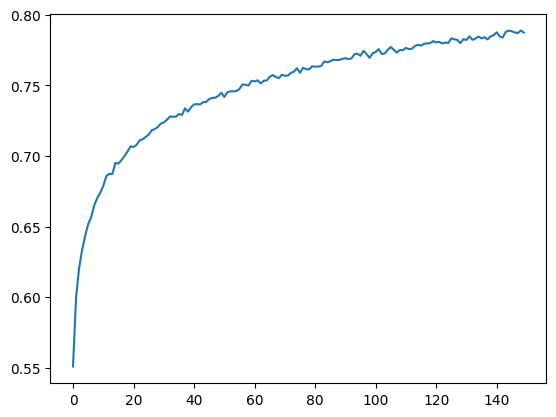

496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


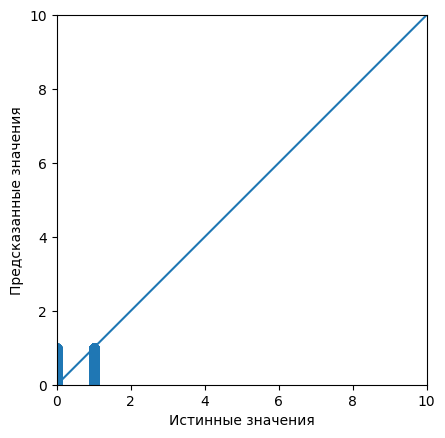

In [32]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['hindle'])
plt.show()

test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()

In [33]:
from sklearn.metrics import roc_curve

In [34]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1], pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

496/496 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


ValueError: multilabel-indicator format is not supported

<Figure size 1000x800 with 0 Axes>